In [3]:
import ROOT
import numpy as np
import os

In [4]:
chain = ROOT.TChain("dihadron")
chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/piminuspi0_prelim/catboost/postprocess/nSidis_50*.root")

13

In [5]:
chain.GetEntries()

398201

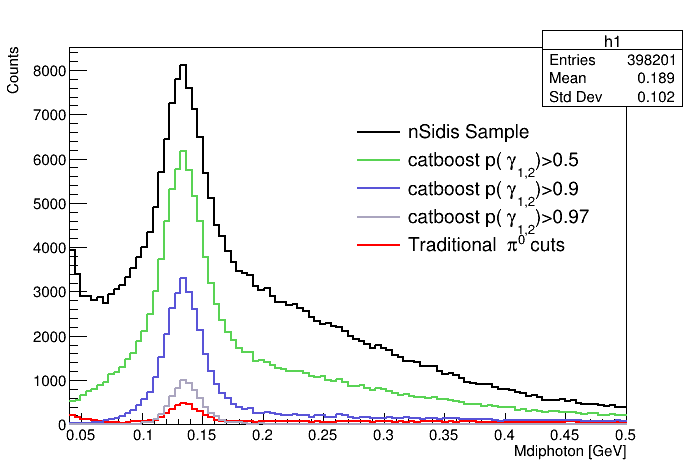

In [6]:
c=ROOT.TCanvas()
ROOT.gStyle.SetHistLineWidth(2)
ROOT.gStyle.SetLegendBorderSize(0)
h1=ROOT.TH1F("h1",";Mdiphoton [GeV];Counts",100,0.04,0.5); h1.SetLineColor(1)
h2=ROOT.TH1F("h2",";Mdiphoton [GeV];Counts",100,0.04,0.5); h2.SetLineColor(2)
h3=ROOT.TH1F("h3",";Mdiphoton [GeV];Counts",100,0.04,0.5); h3.SetLineColor(8)
h4=ROOT.TH1F("h4",";Mdiphoton [GeV];Counts",100,0.04,0.5); h4.SetLineColor(9)
h5=ROOT.TH1F("h5",";Mdiphoton [GeV];Counts",100,0.04,0.5); h5.SetLineColor(40)
chain.Draw("Mgg>>h1","")
chain.Draw("Mgg>>h2","isGoodEventWithoutML","same")
chain.Draw("Mgg>>h3","prob_g1>0.5 && prob_g2>0.5","same")
chain.Draw("Mgg>>h4","prob_g1>0.9 && prob_g2>0.9","same")
chain.Draw("Mgg>>h5","prob_g1>0.97 && prob_g2>0.97","same")
legend=ROOT.TLegend(0.5,0.45,0.85,0.75)
legend.AddEntry(h1,"nSidis Sample","l")
legend.AddEntry(h3,"catboost p(#gamma_{1,2})>0.5","l")
legend.AddEntry(h4,"catboost p(#gamma_{1,2})>0.9","l")
legend.AddEntry(h5,"catboost p(#gamma_{1,2})>0.97","l")
legend.AddEntry(h2,"Traditional #pi^{0} cuts","l")
legend.Draw("same")

ymax=0
for i in range(h1.GetNbinsX()):
    if(h1.GetBinContent(i+1)>ymax):
        ymax=h1.GetBinContent(i+1)
h1.GetYaxis().SetRangeUser(0,ymax*1.05)


c.Draw()

In [62]:
chain.GetEntries("Mh<2&&prob_g1>0.9 && prob_g2>0.9&&Mgg>0.05&&Mgg<0.5")

409955

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdiv (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdiv2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdiv3 (Potential memory leak).


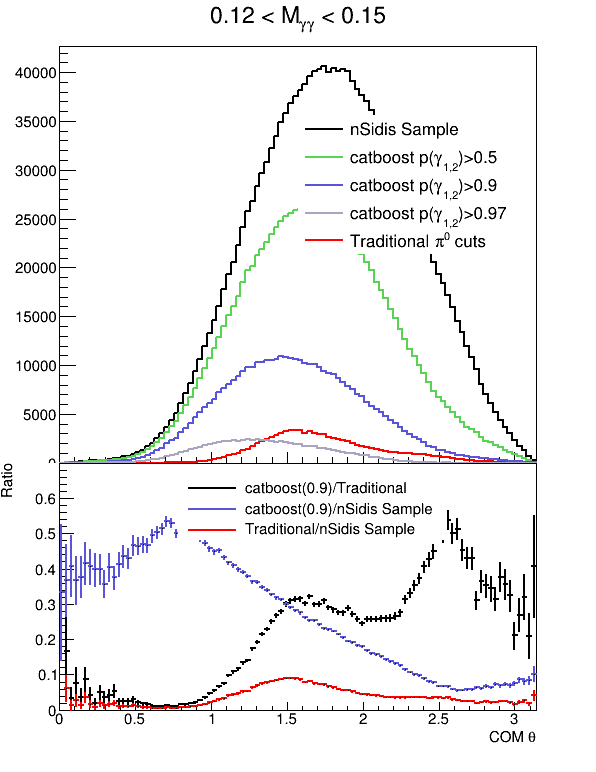

In [72]:
c=ROOT.TCanvas("c","c",600,800)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetHistLineWidth(2)
ROOT.gStyle.SetLegendBorderSize(0)
xaxis_title="COM #theta"
bins=100
xmin=0
xmax=3.1415
draw="th"

pad1=ROOT.TPad("pad1","pad1",0,0.4,1,1)
pad1.Draw("same")
pad1.cd()
pad1.SetBottomMargin(0)
h1=ROOT.TH1F("h1",";{};".format(xaxis_title),bins,xmin,xmax); h1.SetLineColor(1)
h2=ROOT.TH1F("h2",";{};Counts".format(xaxis_title),bins,xmin,xmax); h2.SetLineColor(2)
h3=ROOT.TH1F("h3",";{};Counts".format(xaxis_title),bins,xmin,xmax); h3.SetLineColor(8)
h4=ROOT.TH1F("h4",";{};Counts".format(xaxis_title),bins,xmin,xmax); h4.SetLineColor(9)
h5=ROOT.TH1F("h5",";{};Counts".format(xaxis_title),bins,xmin,xmax); h5.SetLineColor(40)

chain.Draw("{}>>h1".format(draw),"Mgg>0.05&&Mgg<0.5")
chain.Draw("{}>>h2".format(draw),"isGoodEventWithoutML&&Mgg>0.05&&Mgg<0.5","same")
chain.Draw("{}>>h3".format(draw),"prob_g1>0.5 && prob_g2>0.5&&Mgg>0.05&&Mgg<0.5","same")
chain.Draw("{}>>h4".format(draw),"prob_g1>0.9 && prob_g2>0.9&&Mgg>0.05&&Mgg<0.5","same")
chain.Draw("{}>>h5".format(draw),"prob_g1>0.97 && prob_g2>0.97&&Mgg>0.05&&Mgg<0.5","same")
legend=ROOT.TLegend(0.5,0.45,0.85,0.75)
legend.AddEntry(h1,"nSidis Sample","l")
legend.AddEntry(h3,"catboost p(#gamma_{1,2})>0.5","l")
legend.AddEntry(h4,"catboost p(#gamma_{1,2})>0.9","l")
legend.AddEntry(h5,"catboost p(#gamma_{1,2})>0.97","l")
legend.AddEntry(h2,"Traditional #pi^{0} cuts","l")
legend.Draw("same")

h1.SetTitle("0.12 < M_{#gamma#gamma} < 0.15")
ymax=0
for i in range(h1.GetNbinsX()):
    if(h1.GetBinContent(i+1)>ymax):
        ymax=h1.GetBinContent(i+1)
h1.GetYaxis().SetRangeUser(0,ymax*1.05)
h1.GetXaxis().SetTitleSize(0.1)
c.cd()


# Second TPad with acceptance difference
pad2=ROOT.TPad("pad2","pad2",0,0,1,0.4)
pad2.Draw("same")
pad2.cd()
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2)

hdiv = ROOT.TH1F("hdiv",";{};Ratio".format(xaxis_title),bins, xmin, xmax)
hdiv2 = ROOT.TH1F("hdiv2",";{};Ratio".format(xaxis_title),bins, xmin, xmax)
hdiv3 = ROOT.TH1F("hdiv3",";{};Ratio".format(xaxis_title),bins, xmin, xmax)
for b in range(bins):
    if(h4.GetBinContent(b+1)!=0):
        hdiv.SetBinContent(b+1, h2.GetBinContent(b+1)/h4.GetBinContent(b+1) )
        hdiv.SetBinError(b+1, np.sqrt(h2.GetBinError(b+1)**2/(h4.GetBinContent(b+1)**2) + (h2.GetBinContent(b+1)**2)*(h4.GetBinError(b+1)**2)/(h4.GetBinContent(b+1)**4)))
    if(h1.GetBinContent(b+1)!=0):
        hdiv2.SetBinContent(b+1, h4.GetBinContent(b+1)/h1.GetBinContent(b+1) )
        hdiv2.SetBinError(b+1, np.sqrt(h4.GetBinError(b+1)**2/(h1.GetBinContent(b+1)**2) + (h4.GetBinContent(b+1)**2)*(h1.GetBinError(b+1)**2)/(h1.GetBinContent(b+1)**4)))
        hdiv3.SetBinContent(b+1, h2.GetBinContent(b+1)/h1.GetBinContent(b+1) )
        hdiv3.SetBinError(b+1, np.sqrt(h2.GetBinError(b+1)**2/(h1.GetBinContent(b+1)**2) + (h2.GetBinContent(b+1)**2)*(h1.GetBinError(b+1)**2)/(h1.GetBinContent(b+1)**4)))
hdiv.Draw()
hdiv2.Draw("same")
hdiv3.Draw("same")
ymax=0
for i in range(hdiv.GetNbinsX()):
    if(hdiv.GetBinContent(i+1)>ymax):
        ymax=hdiv.GetBinContent(i+1)
if(ymax>1):
    ymax=1/1.3
hdiv.GetYaxis().SetRangeUser(0,ymax*1.3)

hdiv.GetYaxis().SetTitleSize(1.5*hdiv.GetYaxis().GetTitleSize())
hdiv.GetXaxis().SetTitleSize(1.5*hdiv.GetXaxis().GetTitleSize())
hdiv.GetYaxis().SetLabelSize(1.5*hdiv.GetYaxis().GetLabelSize())
hdiv.GetXaxis().SetLabelSize(1.5*hdiv.GetXaxis().GetLabelSize())

hdiv.SetLineColor(1)
hdiv2.SetLineColor(9)
hdiv3.SetLineColor(2)
legend2=ROOT.TLegend(0.3,0.75,0.75,0.95)
legend2.AddEntry(hdiv,"catboost(0.9)/Traditional","l")
legend2.AddEntry(hdiv2,"catboost(0.9)/nSidis Sample","l")
legend2.AddEntry(hdiv3,"Traditional/nSidis Sample","l")
legend2.Draw("same")
c.Draw()

---

In [2]:
chain = ROOT.TChain("dihadron")
chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_noresonance_tiny/catboost/postprocess/MC_3051*.root")

5

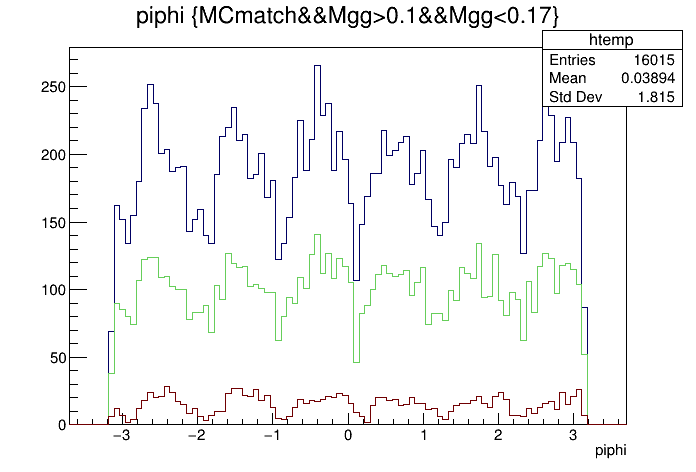

In [3]:
c=ROOT.TCanvas()
ROOT.gStyle.SetPalette(ROOT.kRainBow)
chain.Draw("piphi","MCmatch&&Mgg>0.1&&Mgg<0.17","PLC")
chain.Draw("piphi","MCmatch&&Mgg>0.1&&Mgg<0.17&&prob_g1>0.9&&prob_g2>0.9","PLC same")
chain.Draw("piphi","MCmatch&&isGoodEventWithoutML&&Mgg>0.1&&Mgg<0.17","PLC same")
c.Draw()

---

18476
1935


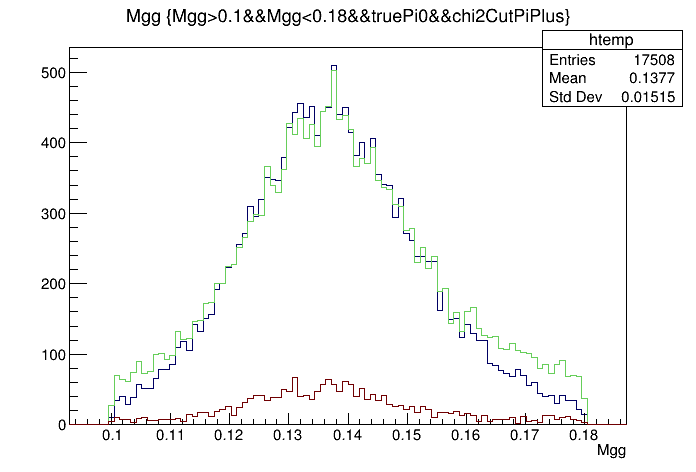

In [15]:
chain.Draw("Mgg","Mgg>0.1&&Mgg<0.18&&truePi0&&chi2CutPiPlus","PLC")
print(chain.Draw("Mgg","Mgg>0.1&&Mgg<0.18&&prob_g1>0.8&&prob_g2>0.8&&chi2CutPiPlus","PLC SAME"))
print(chain.Draw("Mgg","Mgg>0.1&&Mgg<0.18&&isGoodEventWithoutML&&chi2CutPiPlus","PLC SAME"))
c.Draw()

---

In [16]:
chain = ROOT.TChain("dihadron")
nFiles=0
for file in os.listdir("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_prelim/catboost/postprocess/"):
    if("nSidis" in file):
        chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_prelim/catboost/postprocess/"+str(file))
        nFiles+=1
    if(nFiles>50):
        break
#chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_prelim/catboost/postprocess/nSidis_5*.root")

In [17]:
Mhmin = 0.6
Mhmax = 0.8
fit=ROOT.TF2("fpos","[0]*sin(2*x-2*y)+[1]*sin(x-y)+[2]*sin(-x+2*y)+[3]*sin(y)+[4]*sin(x)+[5]*sin(2*x-y)+[6]*sin(3*x-2*y)",-3.141592,3.141592,-3.141592,3.141592)
hpos = ROOT.TH2F("hpos","",8,-np.pi,np.pi,8,np.pi,np.pi)
hneg = ROOT.TH2F("hneg","",8,-np.pi,np.pi,8,np.pi,np.pi)
chain.Draw("phi_R0:phi_h>>hpos","hel==1&&Mgg>0.12&&Mgg<0.15&&prob_g1>0.9&&prob_g2>0.9&&Mh>{}&&Mh<{}&&chi2CutPiPlus".format(Mhmin,Mhmax),"goff")
chain.Draw("phi_R0:phi_h>>hneg","hel==-1&&Mgg>0.12&&Mgg<0.15&&prob_g1>0.9&&prob_g2>0.9&&Mh>{}&&Mh<{}&&chi2CutPiPlus".format(Mhmin,Mhmax),"goff")
#chain.Draw("phi_h:phi_R0>>hpos","hel==1&&Mgg>0.12&&Mgg<0.15&&prob_g1>0.9&&prob_g2>0.9&&Mh>{}&&Mh<{}".format(Mhmin,Mhmax),"goff")
#chain.Draw("phi_h:phi_R0>>hneg","hel==-1&&Mgg>0.12&&Mgg<0.15&&prob_g1>0.9&&prob_g2>0.9&&Mh>{}&&Mh<{}".format(Mhmin,Mhmax),"goff")
hnumerator = hpos.Clone()
hdenominator = hpos.Clone()
hnumerator.Add(hneg,-1)
hdenominator.Add(hneg,1)
hdiv = hnumerator.Clone()
hdiv.Divide(hdenominator)
hdiv.Fit(fit,"S")

 FCN=0.691952 FROM MIGRAD    STATUS=CONVERGED     188 CALLS         189 TOTAL
                     EDM=3.71449e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.23146e-03   1.89292e-02   1.10135e-05   1.36910e-03
   2  p1          -2.99457e-03   2.02381e-02   1.17946e-05   8.49689e-04
   3  p2          -1.28956e-02   1.97690e-02   9.20533e-06   1.63191e-03
   4  p3           9.76728e-04   1.53263e-02   8.08633e-06   2.05242e-03
   5  p4           1.23860e-02   1.90178e-02   8.54211e-06   9.46289e-04
   6  p5          -2.45895e-03   1.58756e-02   8.60954e-06  -1.56883e-03
   7  p6          -9.06866e-05   1.71228e-02   8.90205e-06  -2.34417e-03


Warning in <TROOT::Append>: Replacing existing TH1: hpos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hpos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hpos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hpos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hneg (Potential memory leak).


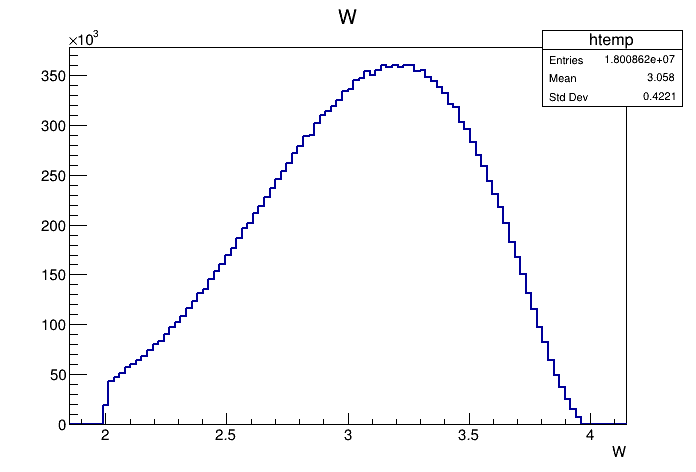

In [24]:
chain.Draw("W")
c.Draw()

In [2]:
chain = ROOT.TChain("dihadron")
chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/piminuspi0_prelim/catboost/postprocess/MC_305*.root")

15

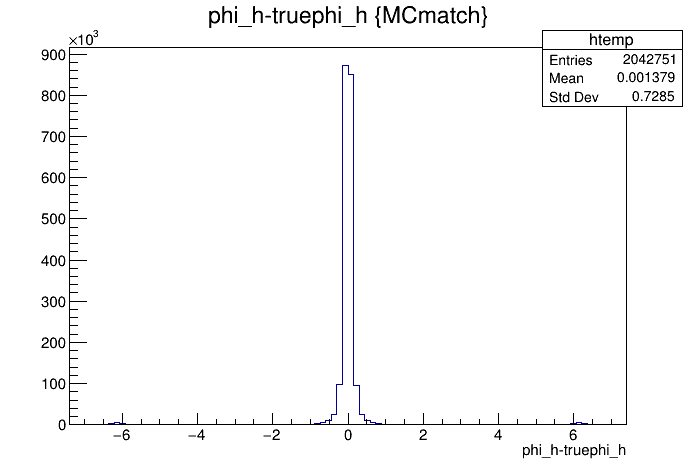

In [7]:
c=ROOT.TCanvas()
chain.Draw("phi_h-truephi_h","MCmatch","colz")
c.SetLogz()
c.Draw()

In [5]:
chain = ROOT.TChain("dihadron")
chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_prelim/catboost/postprocess/MC_305*.root")

15

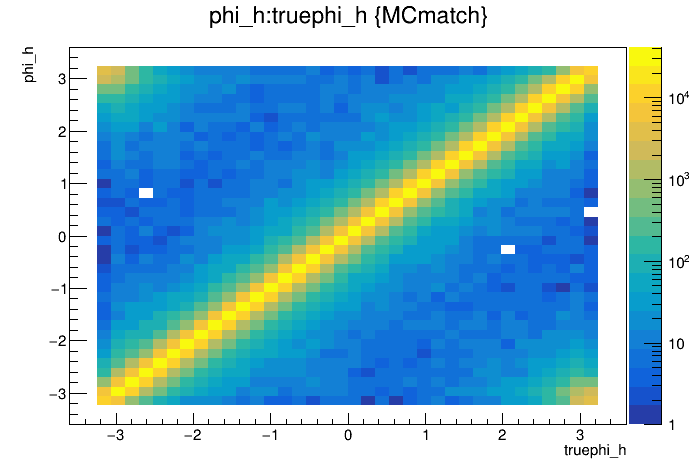

In [6]:
c=ROOT.TCanvas()
chain.Draw("phi_h:truephi_h","MCmatch","colz")
c.SetLogz()
c.Draw()